Best solution found: Solution with parameters: [0.10917339611707932, 1.551411243553924, 0.5269438373378565, 0.5863302209734411, 0.7539131819343403]
Fitness of the best solution: 3.5277718799166413


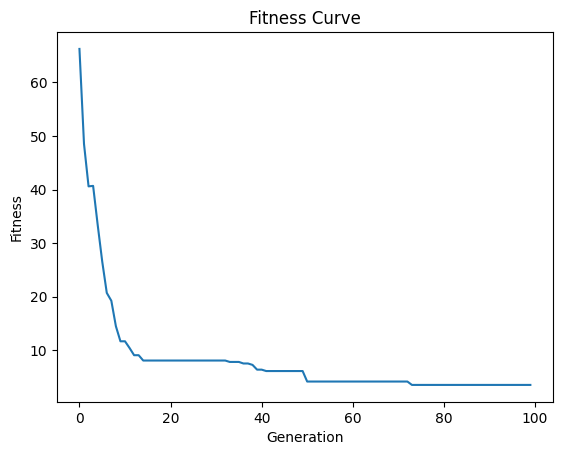

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define a hypothetical Solution class for the boiler design problem
class Solution:
    def __init__(self, parameters):
        self.parameters = parameters  # parameters representing design variables

    def calculate_fitness(self):
        # A hypothetical fitness calculation for a boiler design
        # Lower values are considered better in this example
        return np.sum(self.parameters)

    def __repr__(self):
        return f"Solution with parameters: {self.parameters}"

# Modify the initial population generator to create design solutions
def generate_initial_population(pop_size, num_parameters):
    population = []
    for _ in range(pop_size):
        # Generate random values for each parameter within a specific range
        parameters = np.random.uniform(low=0, high=100, size=num_parameters)
        population.append(Solution(parameters))
    return population

# GeneticAlgorithm class handles the evolution of solutions
class GeneticAlgorithm:
    def __init__(self, pop_size, num_parameters, max_generations, mutation_rate):
        self.pop_size = pop_size
        self.num_parameters = num_parameters
        self.max_generations = max_generations
        self.mutation_rate = mutation_rate
        self.population = generate_initial_population(pop_size, num_parameters)
        self.fitness_curve = []

    def calculate_fitness(self, solution):
        return solution.calculate_fitness()

    def select_parents(self):
        # Sort the population based on fitness and select the top half
        sorted_population = sorted(self.population, key=self.calculate_fitness)
        return sorted_population[:len(sorted_population)//2]

    def crossover(self, parent1, parent2):
        # Create a child with a mix of parameters from both parents
        child_parameters = []
        for i in range(self.num_parameters):
            if random.random() > 0.5:
                child_parameters.append(parent1.parameters[i])
            else:
                child_parameters.append(parent2.parameters[i])
        return Solution(child_parameters)

    def mutate(self, solution):
        # Mutate a solution's parameters based on the mutation rate
        for i in range(self.num_parameters):
            if random.random() < self.mutation_rate:
                solution.parameters[i] = np.random.uniform(low=0, high=100)
        return solution

    def evolve_population(self):
        # Create a new generation using selection, crossover, and mutation
        parents = self.select_parents()
        children = []
        while len(children) < self.pop_size:
            parent1, parent2 = random.sample(parents, 2)
            child = self.crossover(parent1, parent2)
            child = self.mutate(child)
            children.append(child)
        self.population = children

    def run(self):
        for generation in range(self.max_generations):
            self.evolve_population()
            # Calculate the fitness for plotting
            best_solution = min(self.population, key=self.calculate_fitness)
            self.fitness_curve.append(self.calculate_fitness(best_solution))

# Define the boiler design problem and solve it using the genetic algorithm
class BoilerDesignProblem:
    def __init__(self, num_parameters=5, pop_size=100, max_generations=100, mutation_rate=0.01):
        self.ga = GeneticAlgorithm(pop_size, num_parameters, max_generations, mutation_rate)

    def solve(self):
        self.ga.run()
        best_solution = min(self.ga.population, key=self.ga.calculate_fitness)
        print(f"Best solution found: {best_solution}")
        print(f"Fitness of the best solution: {self.ga.calculate_fitness(best_solution)}")

    def plot_fitness_curve(self):
        plt.plot(self.ga.fitness_curve)
        plt.title('Fitness Curve')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.show()

if __name__ == "__main__":
    boiler_problem = BoilerDesignProblem()
    boiler_problem.solve()
    boiler_problem.plot_fitness_curve()


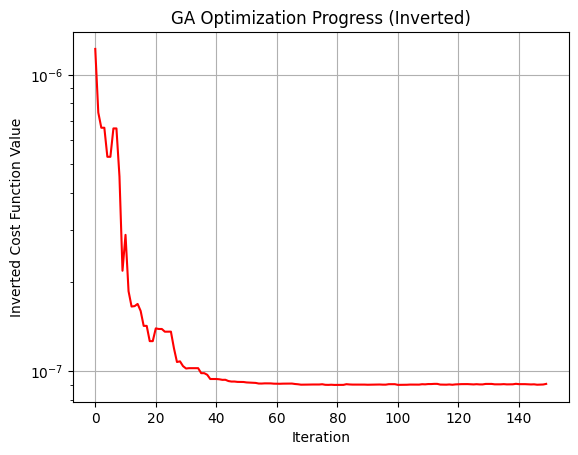

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of variables, bounds, and population size
number_of_variables = 4
var_min = np.array([0, 0, 10, 10])
var_max = np.array([100, 100, 200, 200])
number_of_population = 50
max_generations = 150  # Set the maximum number of generations

# Define the Member class
class Member:
    def __init__(self):
        self.position = None
        self.cost_value = None
        self.constraints_violation = None

# Define the cost function with constraints
def cost_function(x):
    # Cost function
    cost = (0.6224 * x[0] * x[2] * x[3]) + (1.7781 * x[1] * x[2]**2) + \
           (3.1661 * x[0]**2 * x[3]) + (19.84 * x[0]**2 * x[2])

    # Constraints
    g = np.zeros(4)
    g[0] = -x[0] - 0.0193 * x[2]
    g[1] = -x[1] - 0.00954 * x[2]
    g[2] = -np.pi * x[2]**2 * x[3] - (4.0 / 3.0) * np.pi * x[2]**3 + 1296000
    g[3] = x[3] - 240

    # Calculate the total violation of constraints
    constraints_violation = np.sum(np.where(g > 0, g, 0))

    # Penalty for constraints violation
    penalty_factor = 100000
    cost += penalty_factor * constraints_violation

    return cost, constraints_violation

# Initialize the population
population = [Member() for _ in range(number_of_population)]
for member in population:
    member.position = np.random.uniform(var_min, var_max, number_of_variables)
    member.cost_value, member.constraints_violation = cost_function(member.position)

# Genetic Algorithm's crossover function
def uniform_crossover(x1, x2):
    gamma = 0.1
    alpha = np.random.uniform(-gamma, 1 + gamma, np.shape(x1))
    y1 = alpha * x1 + (1 - alpha) * x2
    return y1

# Genetic Algorithm's mutation function
def normal_mutation(x, lower_bound, upper_bound):
    mutation_rate = 0.1
    mutation_indices = np.where(np.random.rand(*x.shape) < mutation_rate)
    mutation_strength = 0.001
    delta = mutation_strength * np.random.randn(*x.shape) * (upper_bound - lower_bound)
    x[mutation_indices] += delta[mutation_indices]
    return x

# Run the Genetic Algorithm
best_cost_per_generation = []  # Store the best cost for plotting

for generation in range(max_generations):
    for member in population:
        # Perform crossover
        if np.random.rand() < 0.5:  # Crossover probability
            other_member = population[np.random.randint(0, number_of_population)]
            member.position = uniform_crossover(member.position, other_member.position)

        # Perform mutation
        member.position = normal_mutation(member.position, var_min, var_max)

        # Enforce bounds
        member.position = np.clip(member.position, var_min, var_max)

        # Calculate cost
        member.cost_value, member.constraints_violation = cost_function(member.position)

    # Selection process to find the best member of this generation
    best_member = min(population, key=lambda m: m.cost_value)
    best_cost_per_generation.append(best_member.cost_value)

# Invert the cost values for plotting (for visual effect)
inverted_costs = [1.0 / cost if cost != 0 else 0 for cost in best_cost_per_generation]

# Plotting the inverted cost values
plt.figure()
plt.semilogy(inverted_costs, 'r-')  # Log scale for y-axis
plt.xlabel('Iteration')
plt.ylabel('Inverted Cost Function Value')
plt.title('GA Optimization Progress (Inverted)')
plt.grid(True)
plt.show()


In [ ]:
io